<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Scotia_NLP_Phase1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install bs4

# Libraries

In [ ]:
# import libraries
import re
import csv
import json
from io import StringIO 
from bs4 import BeautifulSoup
import requests
import numpy as np
from time import sleep
from random import randint
#from selenium import webdriver
import pandas as pd

All Websites list

In [ ]:
url_y_conv = 'https://ca.finance.yahoo.com/quote/BNS.TO/community?p=BNS.TO'
url_wsj = ['https://www.wsj.com/search?query=bank%20of%20nova%20scotia&mod=searchresults_viewallresults','https://www.wsj.com/search?query=bank%20of%20nova%20scotia',
           'https://www.wsj.com/news/types/canada-news?mod=nav_top_subsection'] # Wall Street Journal: www.wsj.com 
url_ft = 'https://www.ft.com/search?sort=relevance&q=bank+of+nova+scotia' # Financial Times: www.ft.com 
url_gm = 'https://www.theglobeandmail.com/search/?q=%22bank+of+nova+scotia%22&S=relevant'	# The Globe & Mail: www.theglobeandmail.com/ 
url_bnn = 'https://www.bnnbloomberg.ca/search/bnn-search-7.337157?q=bank+of+nova+scotia' # BBN Bloomberg: https://www.bnnbloomberg.ca/
#•	Twitter on Canadian banking 


# **Scraping Yahoo *Finance*** Option 1

### **Yahoo *Finance*** reactions on $BNS.TO conversation

In [ ]:
results1 = requests.get(url_y_conv)
web_content1 = BeautifulSoup(results1.text, 'lxml',)
#soup = BeautifulSoup(web_content .text, 'html.parser')
#search_content = web_content.find('ul',{"class":'comments-list'}).text # We search for the user comments and extract text only.
search_content1 = web_content1.find('div',{"id":'Main'}).text # We search for the user comments based on Top Reactions and extract text only.
print(search_content1)

868 reactions on $BNS.TO conversationSign in to post a message.Top ReactionsMMichelleGuys we all bought a great company thanks to someone online telling us to look up a certain company and that's what I'm here to do, look up cts.to its Toronto based it company that has gone from 52m in revenues in 2017 to 1b in 2020, they're $6.37 a share and are currently breaking out towards the 9.31 price target analysts have. they are projected to have an eps of 1.02 by the end of 2024 which at a p/e of 30 gives it a share price of $30.60 and a $18 share price for 2022. massive growth, profitable and grows through 6 acquisitions a year minimum. look them up cts.to worth the 5 minutesReplyReplies (2)4NNasirBought Bns 3 years ago at 81 cn should I sell it and buy Td I am 73ReplyReplies (7)11RRobertDividend payments anyone? Supposed to be today, but nothing for me yet.ReplyReplies (13)1HHBJust sold this at a 33% or so gain. Time to move on into ETFS. Will buy on the next crash! See you there.ReplyRepl

### **Wall Street Journal**

In [ ]:
search_content2 = []
for url in url_wsj:
  results2 = requests.get(url)
  web_content2 = BeautifulSoup(results2.text, 'html.parser')
  #search_text2 = web_content2.find('div',{"class":''}) # We search for the user comments and extract text only.
  search_text2 = web_content2.find_all(text=True) # We search for the user comments based on Top Reactions and extract text only.
  search_content2.append(search_text2)

print(search_content2)

[['\n', 'doctype html', 'GRAND CANYON PREBID ', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n        @font-face {\n          font-family: "Retina";\n          src:\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff2") format("woff2"),\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff") format("woff");\n          font-style: normal;\n          font-weight: 400;\n          font-display: optional;\n        }\n      \n        @font-face {\n          font-family: "Retina";\n          src:\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff2") format("woff2"),\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff") format("woff");\n          font-style: italic;\n          font-weight: 400;\n          font-display: optional;\n        }\n      \n        @font-face {\n          font-

In [ ]:
results3 = requests.get(url_wsj[0])
#web_content4 = BeautifulSoup(results4.text, 'lxml',)
web_content3 = BeautifulSoup(results3.text, 'html.parser')
search_content3 = web_content3.find_all(text=True) # We search for the user comments based on Top Reactions and extract text only.
#search_content4 = web_content4.find_all('scotia')
print(search_content3)

['\n', 'doctype html', 'GRAND CANYON PREBID ', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n        @font-face {\n          font-family: "Retina";\n          src:\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff2") format("woff2"),\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff") format("woff");\n          font-style: normal;\n          font-weight: 400;\n          font-display: optional;\n        }\n      \n        @font-face {\n          font-family: "Retina";\n          src:\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff2") format("woff2"),\n            url("https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff") format("woff");\n          font-style: italic;\n          font-weight: 400;\n          font-display: optional;\n        }\n      \n        @font-face {\n          font-f

### **Financial Times**

### **The Globe & Mail** 

In [ ]:
results4 = requests.get(url_gm)
#web_content4 = BeautifulSoup(results4.text, 'lxml',)
web_content4 = BeautifulSoup(results4.text, 'html.parser')
search_content4 = [web_content4.find('div',{"class":'c-search-results-news'}).text] # We search for the user comments based on Top Reactions and extract text only.
#search_content4 = web_content4.find_all('scotia')
print(search_content4)

['    Report on Business  Scotiabank increases stake in Chilean operations with additional $500-million investment  Subscriber content         James Bradshaw   May 3         Report on Business  Bank of Nova Scotia beats quarterly profit estimates    February 23         Inside the Market  The most oversold and overbought stocks on the TSX  Subscriber content         Scott Barlow   March 29         Report on Business  BMO exposure ‘immaterial’ in Archegos case, bank says  Subscriber content         James Bradshaw   March 30         Report on Business  Scotia CEO’s pay falls a little after big misses in targets  Subscriber content         David Milstead   March 10         Report on Business  Biden’s plan to raise corporate taxes in the U.S. could impact Canadian banks  Subscriber content         James Bradshaw   April 5         Number Cruncher  Ten financial companies with strong profitability, bullish price momentum and reasonable valuations  Subscriber content         Gary Christie   Ma

### **BBN Bloomberg** 

# Pre Processing

In [ ]:
processed_docs = [doc.lower().replace(".","") for doc in search_content]
processed_docs[0:10]

["832 reactions on $bnsto conversationsign in to post a messagetop reactionssscottif a bank can make money in low interest rates, imagine when they start to rise :)replyreplies (1)131hhbsitting on a 34% gain as i bought at 58 should i sell?replyreplies (3)jjor jor binkshi everyone, i just bought into scotia and i'm super excited for the dividend and to watch bank stocks soar on the pandemic recoveryreplyreplies (4)6bbenwhy’s would people be selling this like a week out from ex dividend?reply3sscottthis has it all, growth, value, international exposure, low commercial real estate exposure, growing dividend, and is only going to benefit from rising ratesreplyreplies (2)132rrobertthe government will allow the canadian banks to announce dividends again shortly the budget is a priority but before the third quarter or july 31st they will allow dividends again all the banks have a huge excess of capital over and above the requirements so get ready for special dividends and dividend increasesr

## Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names())
print("-"*10)

#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 
print("-"*10)

temp = tfidf.transform(["if a bank can make money in low interest rates"])
print("Tfidf representation for 'if a bank can make money in low interest rates':\n", temp.toarray())


IDF for all words in the vocabulary [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
----------
All words in the vocabulary ['131hhbsitting', '132rrobertthe', '13bbo8000', '1ffadias', '1nnitini', '2021', '2ddevinnot', '31st', '32

# Pipeline for Sentiment Analysis


https://towardsdatascience.com/sentiment-analysis-of-social-media-with-python-45268dc8f23f

https://towardsdatascience.com/text-sentiment-analysis-in-nlp-ce6baba6d466

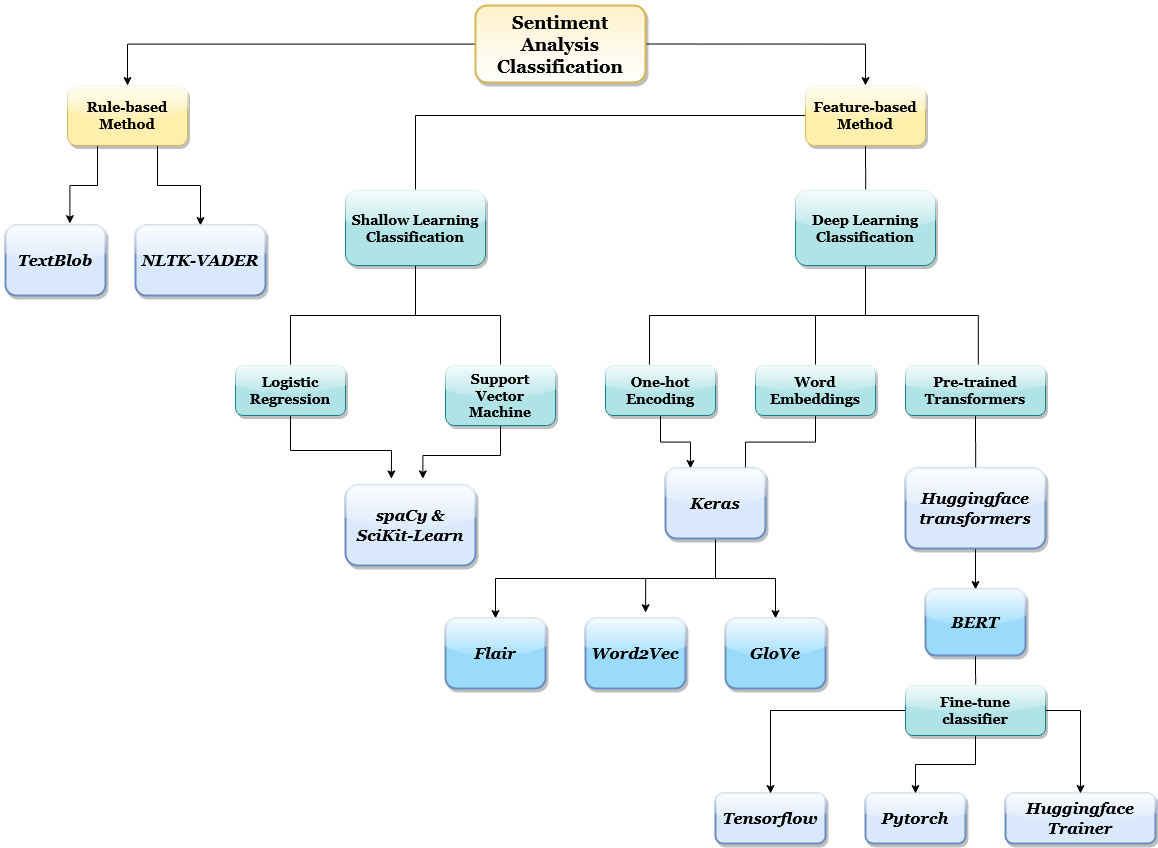